**Bioinformatics Mini Project** 

**Name:** SHANTANU YADAV\
**Roll number:** 21BT30024\
**Accession ID:** GSE52778 (Link:https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE52778)


In [1]:
# Installing necessary libraries
# Installing airway package to get the raw data and the sample information against Accession ID: GSE52778 
if (!requireNamespace("BiocManager", quietly = TRUE))
  install.packages("BiocManager")
BiocManager::install(c("DESeq2", "GEOquery", "airway"))
install.packages("ggplot2")
install.packages("pheatmap")
install.packages("RColorBrewer")
install.packages("tidyverse")
install.packages("dplyr")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.19 (BiocManager 1.30.22), R 4.4.0 (2024-04-24)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'DESeq2' 'GEOquery' 'airway'”
Old packages: 'Biobase', 'BiocGenerics', 'BiocParallel', 'DelayedArray',
  'GenomeInfoDb', 'IRanges', 'MatrixGenerics', 'S4Arrays', 'S4Vectors',
  'SparseArray', 'UCSC.utils', 'XVector', 'limma', 'zlibbioc'




The downloaded binary packages are in
	/var/folders/f9/0sy8b3ls2rl_sjf1b00kr09c0000gn/T//RtmpO5N8mQ/downloaded_packages

The downloaded binary packages are in
	/var/folders/f9/0sy8b3ls2rl_sjf1b00kr09c0000gn/T//RtmpO5N8mQ/downloaded_packages

The downloaded binary packages are in
	/var/folders/f9/0sy8b3ls2rl_sjf1b00kr09c0000gn/T//RtmpO5N8mQ/downloaded_packages

The downloaded binary packages are in
	/var/folders/f9/0sy8b3ls2rl_sjf1b00kr09c0000gn/T//RtmpO5N8mQ/downloaded_packages

The downloaded binary packages are in
	/var/folders/f9/0sy8b3ls2rl_sjf1b00kr09c0000gn/T//RtmpO5N8mQ/downloaded_packages


In [2]:
# Loading necessary libraries
library(DESeq2)
library(GEOquery)
library(airway)
library(ggplot2)
library(airway)
library(pheatmap)
library(RColorBrewer)
library(tidyverse)
library(dplyr)

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    Filter, Find, Map, Position, Reduce, anyDuplicated, aperm, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmin.int, rank, rbind, rownames, sapply, setdiff, table, tapply,
    union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    I, expand.grid, unname


Loading required package: IRanges

Loading required package: GenomicRanges

Loading required package: GenomeInfoDb

Loading r

In [3]:
# Using the airway package to extract the data
data(airway)
airway

sample_info <- as.data.frame(colData(airway))
sample_info <- sample_info[,c(2,3)]
sample_info$dex <- gsub('trt', 'treated', sample_info$dex)
sample_info$dex <- gsub('untrt', 'untreated', sample_info$dex)
names(sample_info) <- c('cellLine', 'dexamethasone')
write.table(sample_info, file = "sample_info.csv", sep = ',', col.names = T, row.names = T, quote = F)

countsData <- assay(airway)
write.table(countsData, file = "counts_data.csv", sep = ',', col.names = T, row.names = T, quote = F)

class: RangedSummarizedExperiment 
dim: 63677 8 
metadata(1): ''
assays(1): counts
rownames(63677): ENSG00000000003 ENSG00000000005 ... ENSG00000273492
  ENSG00000273493
rowData names(10): gene_id gene_name ... seq_coord_system symbol
colnames(8): SRR1039508 SRR1039509 ... SRR1039520 SRR1039521
colData names(9): SampleName cell ... Sample BioSample

In [4]:
# reading the counts data
counts <- read.csv('counts_data.csv')
head(counts)

,SRR1039508,SRR1039509,SRR1039512,SRR1039513,SRR1039516,SRR1039517,SRR1039520,SRR1039521
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ENSG00000000003,679,448,873,408,1138,1047,770,572
ENSG00000000005,0,0,0,0,0,0,0,0
ENSG00000000419,467,515,621,365,587,799,417,508
ENSG00000000457,260,211,263,164,245,331,233,229
ENSG00000000460,60,55,40,35,78,63,76,60
ENSG00000000938,0,0,2,0,1,0,0,0


In [5]:
nrow(counts)

[1] 63677

In [6]:
ncol(counts)

[1] 8

In [7]:
# reading in the sample info
metadata<-read.csv('sample_info.csv')
head(metadata)

,cellLine,dexamethasone
,<chr>,<chr>
SRR1039508,N61311,untreated
SRR1039509,N61311,treated
SRR1039512,N052611,untreated
SRR1039513,N052611,treated
SRR1039516,N080611,untreated
SRR1039517,N080611,treated


In [8]:
# checking if the row names in the metadata matches the column names in the counts
all(colnames(counts) %in% rownames(metadata))
# checking if they are in the same order 
all(colnames(counts) == rownames(metadata))

[1] TRUE

[1] TRUE

In [9]:
# creating a DESeqDataSet object
dds <- DESeqDataSetFromMatrix(countData = counts, 
                              colData = metadata, 
                              design = ~ dexamethasone)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


In [10]:
dds

class: DESeqDataSet 
dim: 63677 8 
metadata(1): version
assays(1): counts
rownames(63677): ENSG00000000003 ENSG00000000005 ... ENSG00000273492
  ENSG00000273493
rowData names(0):
colnames(8): SRR1039508 SRR1039509 ... SRR1039520 SRR1039521
colData names(2): cellLine dexamethasone

In [11]:
# removing entries which have less than 10 reads per sample to reduce compuatational requirement
keep <- rowSums(counts(dds)) >= 10
dds <- dds[keep,]
dds

class: DESeqDataSet 
dim: 22369 8 
metadata(1): version
assays(1): counts
rownames(22369): ENSG00000000003 ENSG00000000419 ... ENSG00000273487
  ENSG00000273488
rowData names(0):
colnames(8): SRR1039508 SRR1039509 ... SRR1039520 SRR1039521
colData names(2): cellLine dexamethasone

In [12]:
# setting up the factor level 
dds$dexamethasone <- relevel(dds$dexamethasone, ref = "untreated")
dds$dexamethasone

[1] untreated treated   untreated treated   untreated treated   untreated
[8] treated  
Levels: untreated treated

In [13]:
dds <- DESeq(dds)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [14]:
normalizecount <- counts(dds, normalized = TRUE)
head(normalizecount)

,SRR1039508,SRR1039509,SRR1039512,SRR1039513,SRR1039516,SRR1039517,SRR1039520,SRR1039521
ENSG00000000003,663.31418,499.92596,740.13337,608.92882,966.3137,748.36352,836.22522,605.57809
ENSG00000000419,456.21167,574.69167,526.48662,544.75250,498.4413,571.10072,452.86483,537.82110
ENSG00000000457,253.99365,235.45620,222.97260,244.76551,208.0377,236.58866,253.03958,242.44298
ENSG00000000460,58.61392,61.37484,33.91218,52.23654,66.2324,45.03047,82.53652,63.52218
ENSG00000000971,3175.89749,4105.41876,5236.88869,6345.99347,5707.0251,7881.76172,5621.17109,8464.33018
ENSG00000001036,1399.89576,1185.09234,1469.24528,1314.86835,1209.1659,1028.55311,1475.88321,1174.10159


In [15]:
res <- results(dds)

In [16]:
res1 <- results(dds, alpha = 0.1)  # Setting alpha for the FDR threshold of 10%
sig_res <- res1[which(res$padj < 0.1), ]
write.csv(as.data.frame(sig_res), file = "Differentially_Expressed_Genes_21BT30024_GSE52778.csv")

In [17]:
summary(res)


out of 22369 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 1884, 8.4%
LFC < 0 (down)     : 1502, 6.7%
outliers [1]       : 51, 0.23%
low counts [2]     : 3903, 17%
(mean count < 4)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [18]:
resordered <- res[order(res$padj),]
head(as.data.frame(resordered))

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000152583,997.4447,4.602555,0.21174194,21.73662,9.245855e-105,1.702624e-100
ENSG00000148175,11193.7232,1.451494,0.08489578,17.09736,1.552859e-65,1.429795e-61
ENSG00000179094,776.6002,3.183883,0.20150941,15.80017,3.102848e-56,1.904631e-52
ENSG00000134686,2737.9816,1.387168,0.09165870,15.13406,9.655331e-52,4.445073e-48
ENSG00000125148,3656.2674,2.203468,0.14741913,14.94696,1.630150e-50,6.003843e-47
ENSG00000120129,3409.0384,2.949013,0.20154644,14.63193,1.757388e-48,5.393715e-45


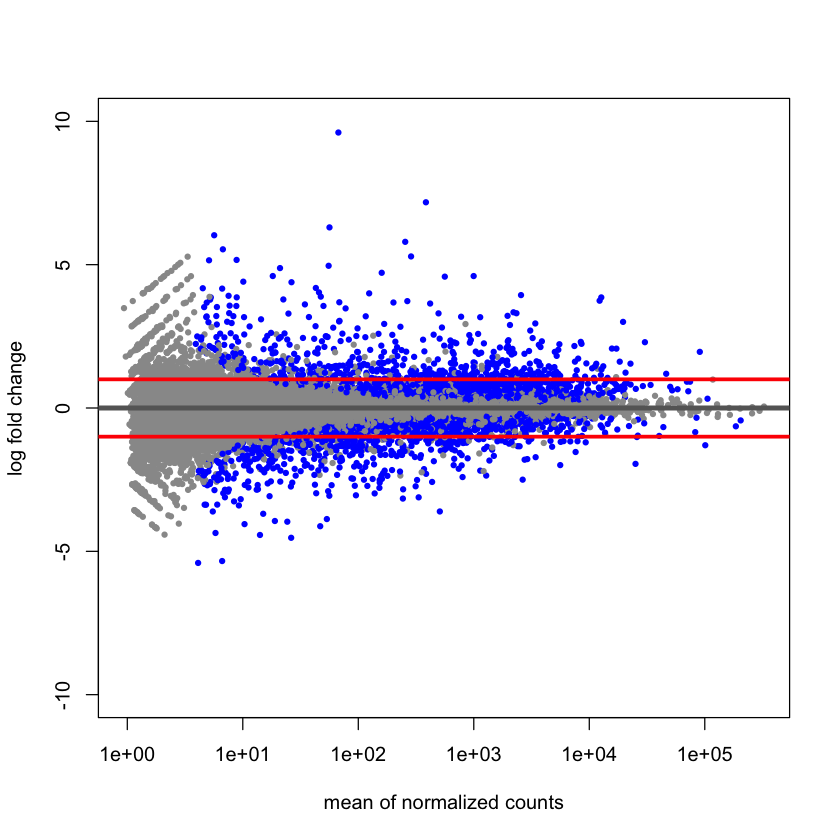

In [19]:
# MA Plot
plotMA(res, cex = 0.7, ylim = c(-10,10))
abline(h = c(-1,1), col = 'red' , lwd = 3)

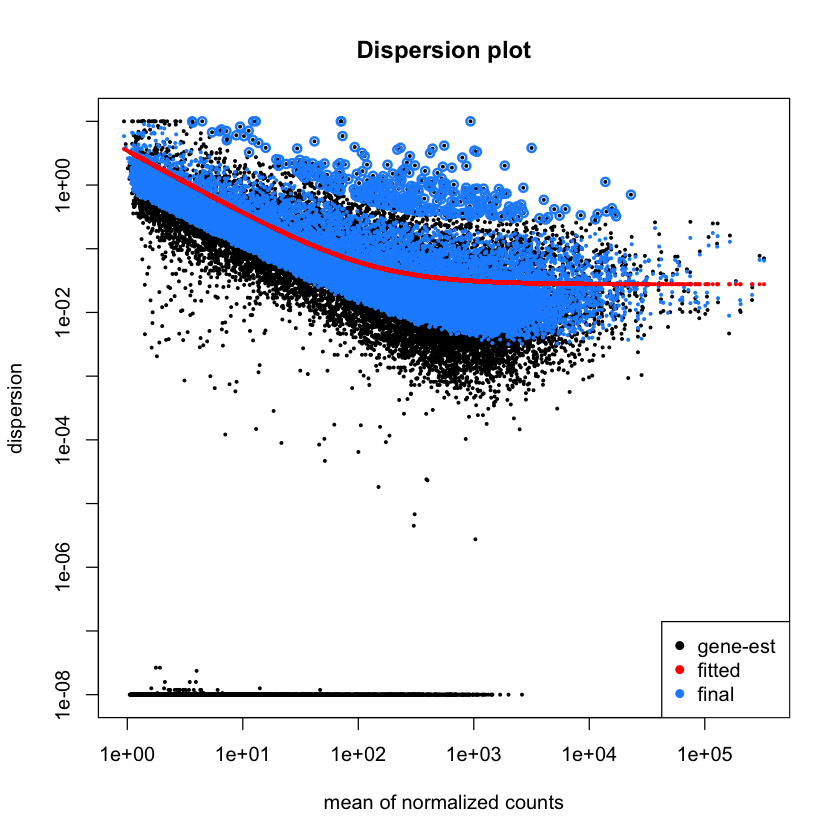

In [20]:
# Dispersion Plot
plotDispEsts(dds, main = "Dispersion plot")

In [21]:
# Principle Component Analysis
rld <- rlogTransformation(dds, blind = FALSE)
head(assay(rld))

,SRR1039508,SRR1039509,SRR1039512,SRR1039513,SRR1039516,SRR1039517,SRR1039520,SRR1039521
ENSG00000000003,9.393425,9.104946,9.507815,9.305974,9.790859,9.519539,9.636174,9.299508
ENSG00000000419,8.888134,9.123971,9.033956,9.068580,8.977866,9.118065,8.880967,9.055748
ENSG00000000457,7.954114,7.882029,7.830464,7.918316,7.765681,7.886543,7.950312,7.909682
ENSG00000000460,5.848745,5.879260,5.514897,5.775701,5.933667,5.676427,6.090288,5.902961
ENSG00000000971,11.842915,12.114966,12.377335,12.587285,12.471048,12.827300,12.454487,12.906679
ENSG00000001036,10.416019,10.238225,10.468186,10.348731,10.259451,10.088304,10.472836,10.228320


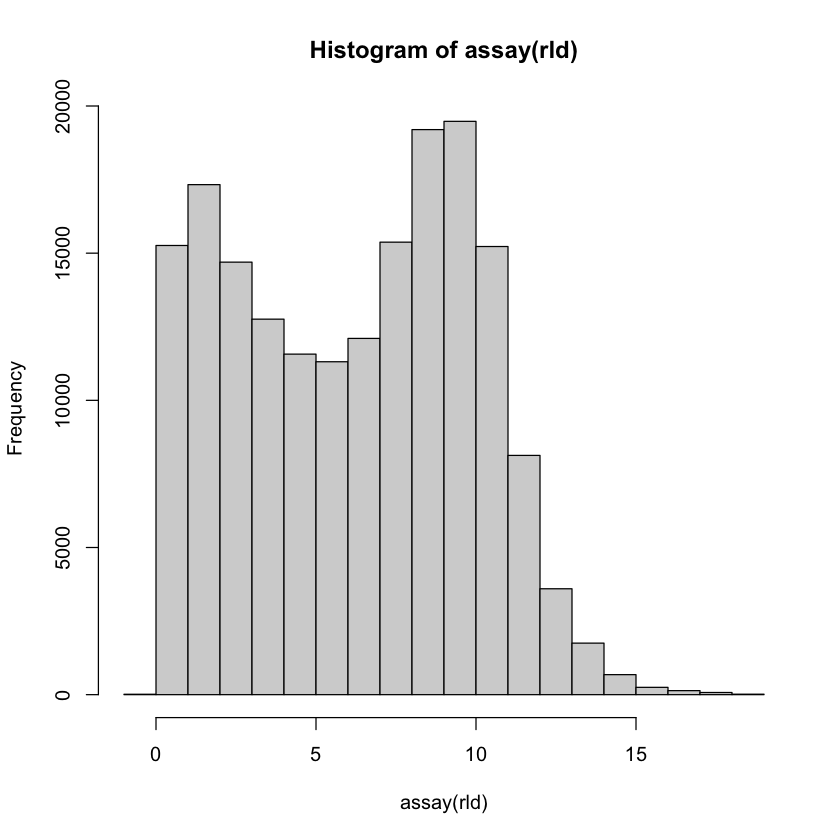

In [22]:
hist(assay(rld))

using ntop=500 top features by variance



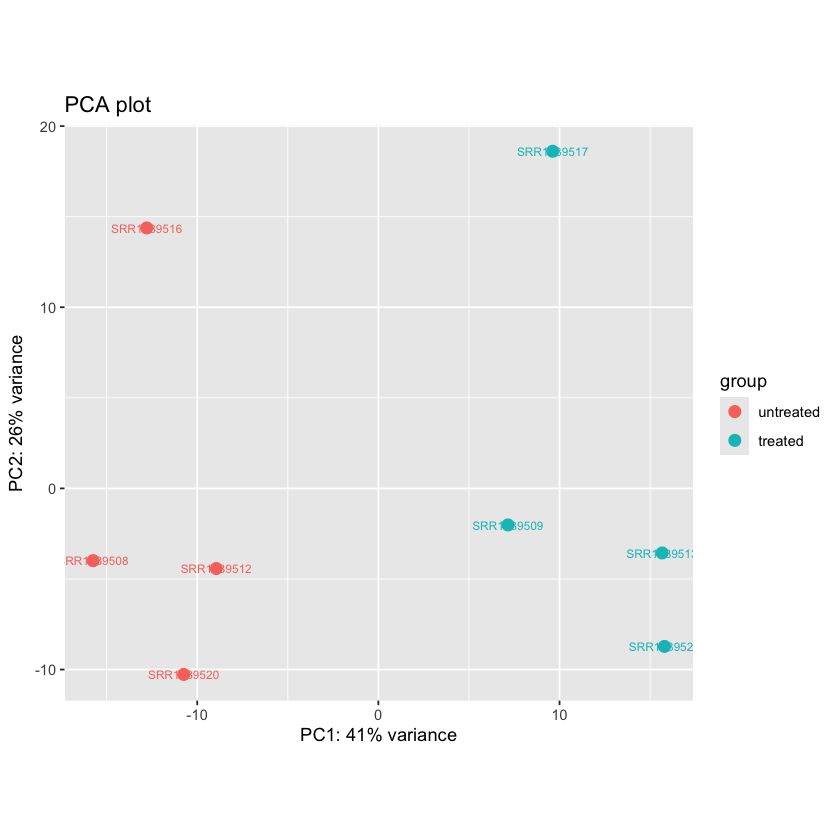

In [23]:
PCAA <- plotPCA(rld, intgroup="dexamethasone")
PCAA + geom_text(aes(label=name), size = 2.5)+ggtitle("PCA plot")

Warning message:
“Removed 51 rows containing missing values or values outside the scale range (`geom_point()`).”


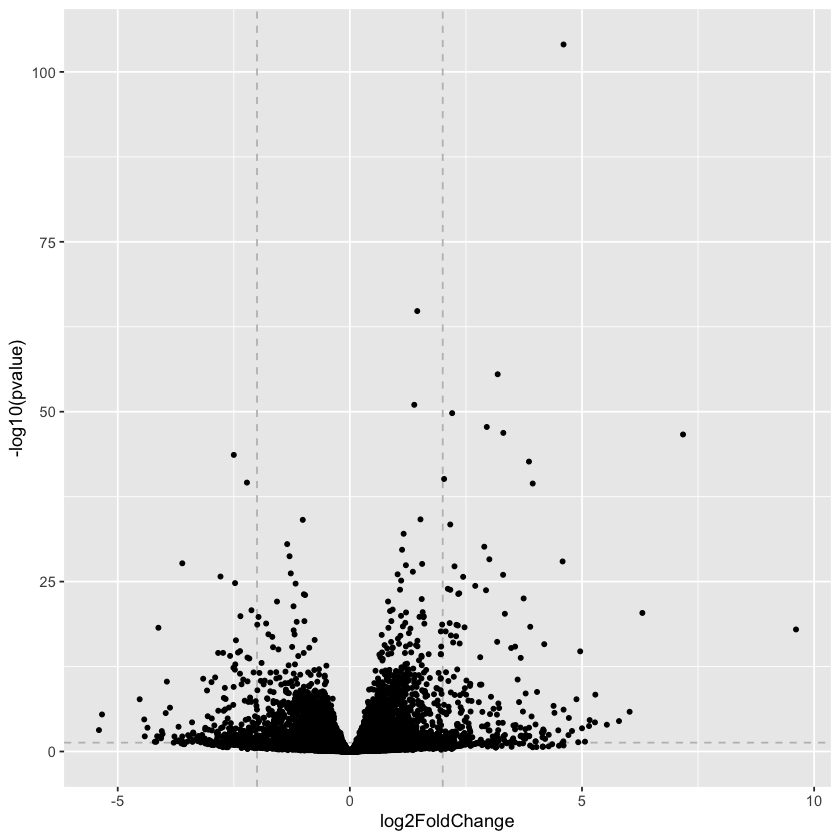

In [24]:
# Volcano Plot
ggplot(data = as.data.frame(res), aes(x = log2FoldChange, y = -log10(pvalue))) +
   geom_vline(xintercept = c(-2, 2), col = "gray", linetype = 'dashed') +
   geom_hline(yintercept = -log10(0.05), col = "gray", linetype = 'dashed') +
   geom_point(size = 1)

In [25]:
## Adding a column to specify if they are upregualted or downregulated (log2fc respectively positive or negative)
resdf <- as.data.frame(res)
resdf$diffexpressed <- "NO"
resdf$diffexpressed[resdf$log2FoldChange > 0.6 & resdf$pvalue < 0.05] <- "UP"
resdf$diffexpressed[resdf$log2FoldChange < -0.6 & resdf$pvalue < 0.05] <- "DOWN"
head(resdf)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,diffexpressed
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
ENSG00000000003,708.59786,-0.37882290,0.1731549,-2.1877685,0.02868647,0.1384695,NO
ENSG00000000419,520.29630,0.20378926,0.1007422,2.0228781,0.04308571,0.1829976,NO
ENSG00000000457,237.16210,0.03406306,0.1264757,0.2693251,0.78767954,0.9298046,NO
ENSG00000000460,57.93238,-0.11715635,0.3015826,-0.3884718,0.69766691,0.8942308,NO
ENSG00000000971,5817.31082,0.44097930,0.2587756,1.7040990,0.08836259,0.2970422,NO
ENSG00000001036,1282.10069,-0.24190968,0.1197128,-2.0207510,0.04330555,0.1834976,NO


Warning message:
“Removed 51 rows containing missing values or values outside the scale range (`geom_point()`).”


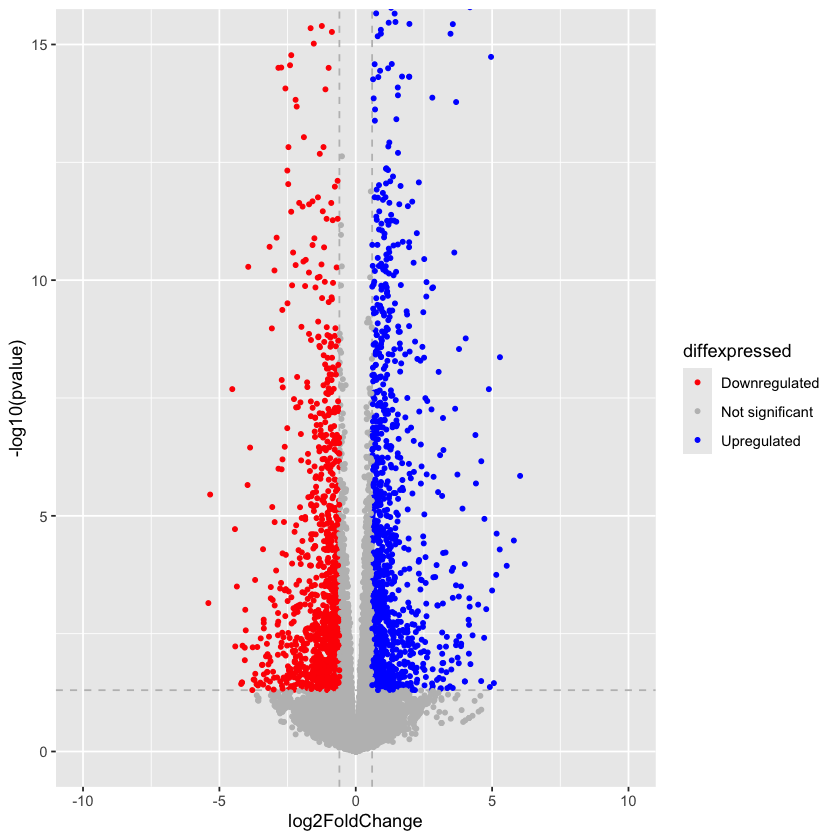

In [26]:
ggplot(data = resdf, aes(x = log2FoldChange, y = -log10(pvalue), col = diffexpressed)) +
   geom_vline(xintercept = c(-0.6, 0.6), col = "gray", linetype = 'dashed') +
   geom_hline(yintercept = -log10(0.05), col = "gray", linetype = 'dashed') +
   coord_cartesian(ylim = c(0, 15), xlim = c(-10, 10)) +
   geom_point(size = 1) +
   scale_color_manual(values = c("red", "grey", "blue"), labels = c("Downregulated", "Not significant", "Upregulated"))

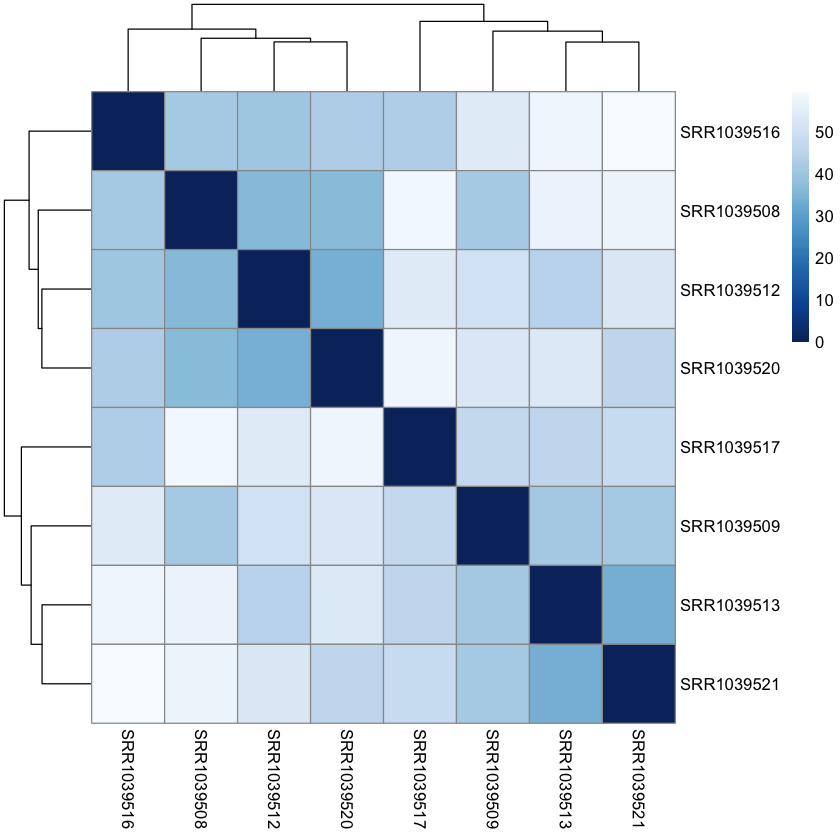

In [27]:
# Data quality assesment by sample clustering
sampleDists <- dist(t(assay(rld)))
sampleDistMatrix <- as.matrix(sampleDists)
#colnames(sampleDistMatrix)
colors <- colorRampPalette(rev(brewer.pal(9, "Blues")))(255)
pheatmap(sampleDistMatrix,
        clustering_distance_rows=sampleDists,
        clustering_distance_cols=sampleDists,
        col=colors,
        width = 20,
        height = 20)

In [28]:
fil_infodata <- read.csv('sample_info.csv')

In [29]:
if (exists("fil_infodata")) {
  print("fil_infodata exists")
} else {
  print("fil_infodata does not exist")
}

[1] "fil_infodata exists"


[1] "DESeqResults"
attr(,"package")
[1] "DESeq2"

[1] "ENSG00000152583" "ENSG00000148175" "ENSG00000179094" "ENSG00000134686"
 [5] "ENSG00000125148" "ENSG00000120129" "ENSG00000189221" "ENSG00000109906"
 [9] "ENSG00000178695" "ENSG00000101347" "ENSG00000162614" "ENSG00000196517"
[13] "ENSG00000096060" "ENSG00000162616" "ENSG00000116584" "ENSG00000166741"
[17] "ENSG00000183044" "ENSG00000144369" "ENSG00000198624" "ENSG00000164125"

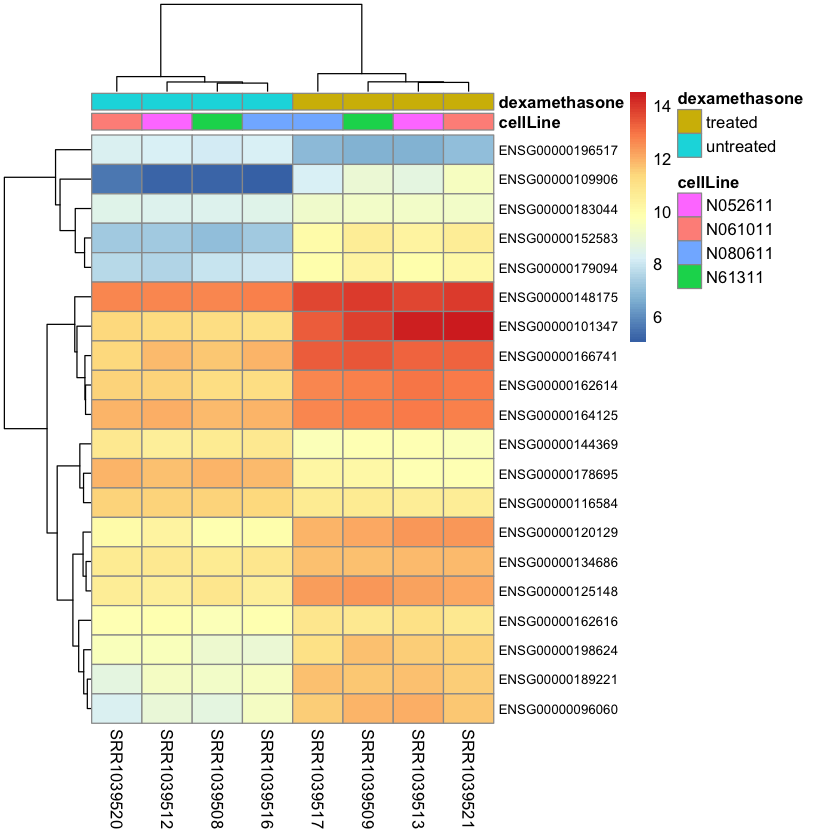

In [30]:
#heatmap of log transformed normalized count
top_genes <- res[order(res$padj),][1:20,]
class(top_genes)
top_genes <- row.names(top_genes)
top_genes
pheatmap(assay(rld)[top_genes,], cluster_rows = TRUE, show_rownames = TRUE, cluster_cols = TRUE, fontsize_row = 8, annotation_col = fil_infodata)

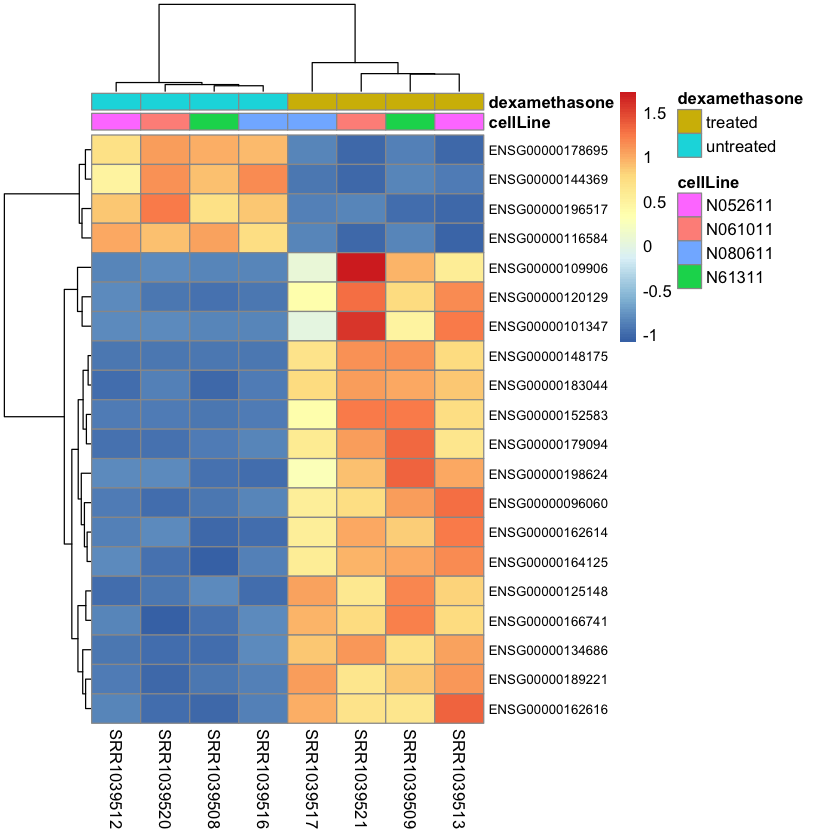

In [31]:
#heatmap of z score of top 20 genes
cal_z_score <- function(x) {((x-mean(x))/sd(x))}
z_score_all <- t(apply(normalizecount,1,cal_z_score))
z_score_subset <- z_score_all [top_genes,]
pheatmap(z_score_subset, cluster_rows = TRUE, show_rownames = TRUE, cluster_cols = TRUE, fontsize_row = 8, annotation_col = fil_infodata)